In [1]:
from bs4 import BeautifulSoup as bs
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from ForumParsingTools import *

In [18]:
agora_df1 = pd.read_csv('data/agora_stats.out', sep="\t")
agora_df1 = agora_df1.drop(columns=['speed_download','total_time', 'rid','type'])

In [19]:
agora_df1['timestamp'] = agora_df1['timestamp'].apply(pd.to_datetime)

In [48]:
agora_subdf1 = agora_df1[agora_df1['sitename'] == "Agora"]
forum_subdf1 = agora_df1[agora_df1['sitename'] == "Agora Forums"]

In [21]:
def fixIsUp(s):
    if(int(s) != 200):
        return 0
    else:
        return 1

In [22]:
agora_df1['siteup'] = agora_df1['httpcode'].apply(fixIsUp)

In [50]:
agora_df1[agora_df1['siteup'] == 1]

,sitename,siteup,httpcode,timestamp
36180,Agora,1,200,2015-09-07
36182,Agora,1,200,2015-09-07
36184,Agora,1,200,2015-09-07
36186,Agora,1,200,2015-09-07
36188,Agora,1,200,2015-09-07
...,...,...,...,...
324330,Agora Forums,1,200,2014-04-24
324332,Agora Forums,1,200,2014-04-24
324333,Agora Forums,1,200,2014-04-24
324336,Agora Forums,1,200,2014-04-24


In [24]:
def truncateTime(t):
    return t.round(freq='D')

In [25]:
agora_df1['timestamp'] = agora_df1['timestamp'].apply(truncateTime)

In [51]:
agora_subdf1 = agora_subdf1.groupby(by='timestamp').mean()
forum_subdf1 = forum_subdf1.groupby(by='timestamp').mean()

In [49]:
agora_df1.groupby(by=['sitename','timestamp']).mean()

siteup    httpcode
sitename     timestamp                       
Agora        2014-04-24  0.934211  213.421053
             2014-04-25  1.000000  200.000000
             2014-04-26  0.991071  202.705357
             2014-04-27  0.990291  202.932039
             2014-04-28  0.989583  203.145833
...                           ...         ...
Agora Forums 2015-11-05  0.000000  503.000000
             2015-11-06  0.000000  503.000000
             2015-11-07  0.000000  503.000000
             2015-11-08  0.000000  503.000000
             2015-11-09  0.000000  503.000000

[1130 rows x 2 columns]

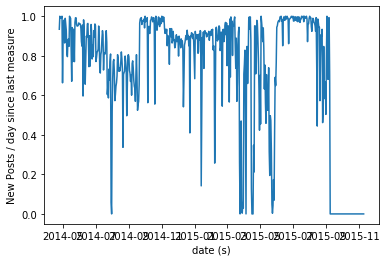

In [55]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('date (s)')
ax1.set_ylabel('New Posts / day since last measure')
ax1.plot(agora_subdf1.index, agora_subdf1['siteup'])
ax1.tick_params(axis='y')
plt.show()

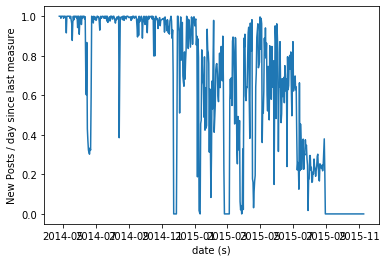

In [56]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('date (s)')
ax1.set_ylabel('Up')
ax1.plot(forum_subdf1.index, forum_subdf1['siteup'])
ax1.tick_params(axis='y')

plt.show()